In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [38]:
london = 'london.csv'
lon = pd.read_csv(london)
lon.timestamp = pd.to_datetime(lon['timestamp'])
lon

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2     2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3     2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4     2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...   ...  ...  ...    ...         ...           ...   
17409 2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410 2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411 2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412 2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413 2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–∞—Ç–∞–º –∏ –≤—Ä–µ–º–µ–Ω–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫, –≥–¥–µ:

–ø–æ –æ—Å–∏ x ‚Äì –¥–∞—Ç–∞ (timestamp)
–ø–æ –æ—Å–∏ y ‚Äì —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ (cnt)

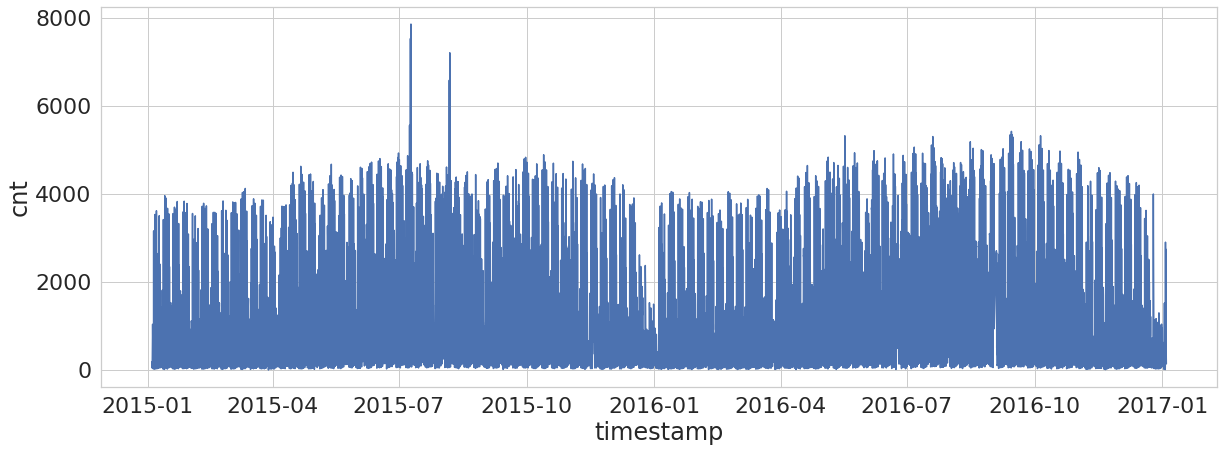

In [23]:
sns.lineplot(x = 'timestamp', y = 'cnt', data = lon)

–û—Ç–ª–∏—á–Ω–æ! –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å. –í —ç—Ç–æ–º –Ω–∞–º –ø–æ–º–æ–∂–µ—Ç resample, —Å –∫–æ—Ç–æ—Ä—ã–º –≤—ã –º–æ–≥–ª–∏ —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è –≤ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç–µ–º–∞—Ö pandas. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫ –∫–∞–∫–æ–º—É-–ª–∏–±–æ —Å—Ç–æ–ª–±—Ü—É –¥—Ä—É–≥–æ–π –º–µ—Ç–æ–¥ (–Ω–∞–ø—Ä. sum). –¢–∞–∫ –º–æ–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∑–∞ –≤–µ—Å—å –¥–µ–Ω—å –∏–ª–∏ –º–µ—Å—è—Ü, –∏–º–µ—è –¥–∞–Ω–Ω—ã–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –º–∏–Ω—É—Ç. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—É–º–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –ø–æ –¥–Ω—è–º, –∏–º–µ—è –¥–∞–Ω–Ω—ã–µ –ø–æ —á–∞—Å–∞–º, –º–æ–∂–Ω–æ —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

–ê–≥—Ä–µ–≥–∏—Ä—É–π—Ç–µ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–Ω—è–º –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ?

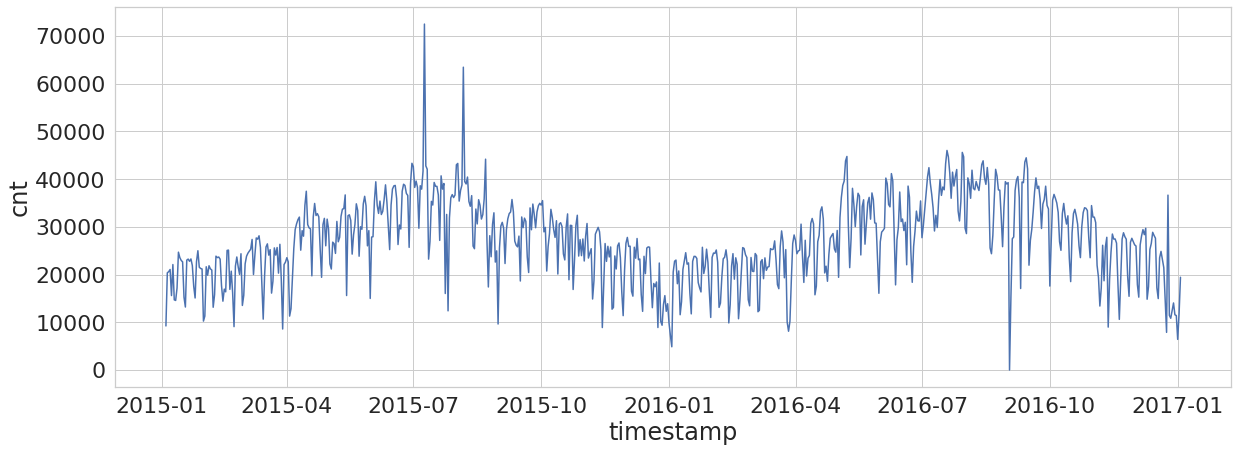

In [46]:
# —Å–ø–æ—Å–æ–± 1
# data.resample(rule='D').column_name.sum()
# —Å–ø–æ—Å–æ–± 2
# data.resample(rule='D').agg({'column_name':'sum'})

lon.timestamp = lon.timestamp.sort_values()
lon2 = (lon.set_index('timestamp')).resample(rule='D').cnt.sum().reset_index()
sns.lineplot(x = 'timestamp', y = 'cnt', data = lon2)

–ò—Ç–∞–∫, –≤—ã –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–∫–∞—á–∫–∏. –î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –∂–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏ –≤ —Ç–µ –¥–Ω–∏ - –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ —ç—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è –¥–ª—è –Ω–∞—Å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã ü§î. –î–ª—è —ç—Ç–æ–≥–æ –º—ã –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –≤–æ–∫—Ä—É–≥ –¥–∞–Ω–Ω—ã—Ö - –≤—Å—ë, —á—Ç–æ –≤—ã–ø–∞–¥–∞–µ—Ç –∑–∞ –µ–≥–æ –ø—Ä–µ–¥–µ–ª—ã, –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –∞–Ω–æ–º–∞–ª–∏–µ–π, –∏ –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∏–∑ –Ω–∏—Ö –º—ã –ø–æ—Ç–æ–º –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º.

–û–¥–Ω–∞–∫–æ –Ω–µ –≤—Å—ë —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ. –ú—ã —Å–µ–π—á–∞—Å —Ä–∞–±–æ—Ç–∞–µ–º —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º —Ä—è–¥–æ–º - –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –∑–Ω–∞—á–µ–Ω–∏–π, –º–µ–Ω—è—é—â–µ–π—Å—è –≤–æ –≤—Ä–µ–º–µ–Ω–∏. –ú—ã –Ω–µ –º–æ–∂–µ–º –ø—Ä–æ—Å—Ç–æ —Ç–∞–∫ –ø–æ—Å—á–∏—Ç–∞—Ç—å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –¥–ª—è –≤—Å–µ–≥–æ: —Ç–∞–∫ –º—ã –º–æ–∂–µ–º —É–ø—É—Å—Ç–∏—Ç—å –≤–∞–∂–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö! –ù–∞–ø—Ä–∏–º–µ—Ä, —Å–µ–∑–æ–Ω–Ω—ã–µ –∫–æ–ª–µ–±–∞–Ω–∏—è. 

–ß—Ç–æ–±—ã —É—á–µ—Å—Ç—å —ç—Ç–æ—Ç –º–æ–º–µ–Ω—Ç, –º—ã –ø–æ—Å—Ç—Ä–æ–∏–º –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª, –∏—Å–ø–æ–ª—å–∑—É—è —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ. –î–ª—è —ç—Ç–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–ª—å–Ω–µ–π—à–∏–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤:

—Å–Ω–∞—á–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ, —á—Ç–æ–±—ã —Å–≥–ª–∞–¥–∏—Ç—å —Ä—è–¥
–¥–∞–ª–µ–µ ‚Äì —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
–æ–ø—Ä–µ–¥–µ–ª–∏–º –≤–µ—Ä—Ö–Ω–∏–µ –∏ –Ω–∏–∂–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ 
–Ω–∞–π–¥–µ–º –ø—Ä–∏—á–∏–Ω—ã –∞–Ω–æ–º–∞–ª–∏–π!
–ù–∞ –¥–∞–Ω–Ω–æ–º —à–∞–≥–µ –≤–æ–∑—å–º–∏—Ç–µ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–Ω—è–º —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —à–∞–≥–∞ –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –æ–∫–Ω–æ–º 3. –í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ —É–∫–∞–∂–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ –∞—Ä–µ–Ω–¥ –∑–∞ 2015-07-09, –æ–∫—Ä—É–≥–ª–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–æ —Ü–µ–ª–æ–≥–æ.

In [52]:
lon2['rolling3'] = lon2.cnt.rolling(window=3).mean()
answer = lon2.query('timestamp == "2015-07-09"').rolling3
answer

186    50705.0
Name: rolling3, dtype: float64

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ –ø–æ–¥—Å—á–∏—Ç–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –î–∞–ª–µ–µ ‚Äì –ø—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è.

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ –≤–≤–µ–¥–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ, –æ–∫—Ä—É–≥–ª–µ–Ω–Ω–æ–µ –¥–æ 2 –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏.

In [56]:
std = np.std(lon2.cnt - lon2.rolling3)
round(std, 2)

4558.59

–¢–µ–ø–µ—Ä—å –æ–ø—Ä–µ–¥–µ–ª–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤. –î–ª—è —ç—Ç–æ–≥–æ –Ω—É–∂–Ω–æ –≤–∑—è—Ç—å –¥–∞–Ω–Ω—ã–µ, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –∏ —Å–æ–∑–¥–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –æ–±—ä–µ–∫—Ç—ã:

upper_bound ‚Äì –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞; –∫ —Å–∫–æ–ª—å–∑—è—â–∏–º —Å—Ä–µ–¥–Ω–∏–º –ø—Ä–∏–±–∞–≤–ª—è–µ–º 2.576‚àóstd
lower_bound ‚Äì –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞; –≤—ã—á–∏—Ç–∞–µ–º 2.576‚àóstd
–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—à–∏—Ç–µ –≤ –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.

–ß–µ–º—É —Ä–∞–≤–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–µ—Ä—Ö–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è? –û—Ç–≤–µ—Ç —É–∫–∞–∂–∏—Ç–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 2 –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —Ç–æ—á–∫–∏.

Note: –≤ –∫–∞—á–µ—Å—Ç–≤–µ std –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –±–µ–∑ –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è.

Note 2: –≤–∞–º –º–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è —É–±—Ä–∞—Ç—å –¥–∞—Ç—ã –∏–∑ –∏–Ω–¥–µ–∫—Å–∞ - –∏–Ω–æ–≥–¥–∞ –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ –∫–æ–ª–æ–Ω–∫–∏ –º–æ–≥—É—Ç –Ω–µ –ø—Ä–∏—Å–≤–∞–∏–≤–∞—Ç—å—Å—è –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º. –í–∞–º –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è .reset_index().

In [62]:
lon2['upper_bound'], lon2['lower_bound'] = lon2.rolling3 + (std * 2.576), lon2.rolling3 - (std * 2.576)
lon2.tail(3)

timestamp    cnt      rolling3   upper_bound  lower_bound
728 2017-01-01   6421   9803.666667  21546.585854 -1939.252521
729 2017-01-02  11823   9889.333333  21632.252521 -1853.585854
730 2017-01-03  19436  12560.000000  24302.919188   817.080812

–ò –Ω–∞–∫–æ–Ω–µ—Ü ‚Äì –∏–∑—É—á–∏–º –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è! –°–Ω–∞—á–∞–ª–∞ –≤—ã–≤–µ–¥–∏—Ç–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–∫–∞–∑–∞–ª–∏—Å—å –±–æ–ª—å—à–µ –≤–µ—Ä—Ö–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞.

–í –∫–∞–∫–æ–π –¥–µ–Ω—å –∑–Ω–∞—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∞–∏–±–æ–ª—å—à–∏–º? –£–∫–∞–∂–∏—Ç–µ –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç–µ 2020-12-31.

In [65]:
maxind = lon2.query('cnt > upper_bound').upper_bound.idxmax()
lon2.iloc[maxind]

timestamp      2015-07-09 00:00:00
cnt                          72504
rolling3                     50705
upper_bound                62447.9
lower_bound                38962.1
Name: 186, dtype: object

In [66]:
lon2.query('timestamp == "2016-09-02"')

timestamp  cnt      rolling3   upper_bound   lower_bound
607 2016-09-02    0  26086.333333  37829.252521  14343.414146

In [68]:
lon2.query('cnt < lower_bound')

timestamp    cnt      rolling3   upper_bound   lower_bound
130 2015-05-14  15609  28709.333333  40452.252521  16966.414146
189 2015-07-12  23240  36036.666667  47779.585854  24293.747479
201 2015-07-24  16034  31013.666667  42756.585854  19270.747479
232 2015-08-24  17400  29529.333333  41272.252521  17786.414146
314 2015-11-14   8898  21037.333333  32780.252521   9294.414146
607 2016-09-02      0  26086.333333  37829.252521  14343.414146
615 2016-09-10  17080  31262.000000  43004.919188  19519.080812
621 2016-09-16  21967  36193.333333  47936.252521  24450.414146
678 2016-11-12   8990  20878.000000  32620.919188   9135.080812